In [16]:
# Bibliothèques requises
import pandas as pd

# Chargement du fichier CSV
df = pd.read_csv('dataset_bp_brute.csv')

# Liste des colonnes à conserver
columns_to_keep = ['reviews/0/text', 'reviews/0/stars', 'address', 'city','location/lat','location/lng']

# Suppression des colonnes indésirables
df = df[columns_to_keep]

# Dictionnaire des nouveaux noms de colonnes
nouvelles_colonnes = {
    'reviews/0/text': 'Commentaires',
    'reviews/0/stars': 'Nombre_étoiles',
    'address': 'Adresse',
    'city': 'Ville',
    'location/lat': 'Lattitude',
    'location/lng': 'Longetude'}

# Renommage des colonnes
df = df.rename(columns=nouvelles_colonnes)


<ipython-input-16-e929d5bb4ffd>:5: DtypeWarning: Columns (0,3,6,11,71,73,412,413,432,441,442,457,464,465,466,467,468,469,470,471,472,487,493,494,509,516,517,518,519,536,537,544,545,546,547,548,549,564,571,572,573,590,591,596,597,598,613,615,620,641,658,659,664,685,686,687,688,696,708,725,730,731,732,767,784,788,789,790,791,792,793,818,819,839,849,850,851,852,853,854,855,856,857,865,882,898,899,916,932,933,943,951,967,968,985,986,989,990,994,1001,1003,1006,1007,1011,1018,1019,1020,1023,1024,1028,1029,1036,1037,1038,1041,1042,1046,1053,1054,1055,1058,1059,1063,1070,1071,1072,1075,1076,1080,1087,1088,1089,1092,1093,1097,1104,1105,1106,1109,1110,1114,1121,1122,1123,1126,1127,1131,1138,1139,1140,1143,1144,1148,1155,1156,1157,1160,1161,1165,1166,1167,1168,1169,1170,1171,1172,1173,1180,1182,1185,1186,1190,1197,1199,1202,1203,1207,1214,1215,1216,1219,1220,1224,1225,1232,1233,1234,1237,1238,1242,1249,1250,1251,1254,1255,1259,1266,1268,1271,1272,1276,1283,1285,1288,1289,1293,1294,1295,1304,1307,

In [17]:
# Supppression des valeurs dupliquées
df.duplicated().sum()
df.drop_duplicates(inplace=True)

# Suppression des valeurs nulles 
df.isnull().sum()
df = df.dropna()
df
df.isnull().sum()

Commentaires      0
Nombre_étoiles    0
Adresse           0
Ville             0
Lattitude         0
Longetude         0
dtype: int64

In [18]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from langdetect import detect

colonne_commentaires = 'Commentaires'

# Fonction pour détecter la langue
def detecter_langue(texte):
    try:
        langue = detect(texte)
        return langue == 'fr'
    except:
        return False

# Suppression des textes non français
df = df[df[colonne_commentaires].apply(detecter_langue)]
df

,Commentaires,Nombre_étoiles,Adresse,Ville,Lattitude,Longetude
2,Le personnel est bien accueillant ! Et le ser...,5.0,"JXWQ+8MH, Marrakech 40000, Maroc",Marrakech,31.645821,-8.010763
6,"Agence effroyable , personnel brute , service ...",1.0,"RXX5+RQH, Skhirat, Maroc",Skhirat,33.849555,-7.040506
12,Notre agence à l'honneur de vous accueillir du...,5.0,"GR45+JC6، R308, El Borouj, Maroc",El Borouj,32.506526,-7.191484
19,Personnel professionnel et attente correct.,5.0,"GCQW+6H8, Boulevard Al Joulane, Casablanca, Maroc",Casablanca,33.538043,-7.553551
20,service médiocre aucun respect pour les clients,1.0,"H835+3J4, Casablanca, Maroc",Casablanca,33.552647,-7.690906
...,...,...,...,...,...,...
1154,Je lui donne 1 juste pour me permettre d ajout...,1.0,"W494+W4J, Av. Ibn Khaldoun, Témara, Maroc",Témara,33.919835,-6.894732
1156,Une des pires succursales (toutes banques conf...,1.0,"25, avenue Al Massira (C.y.m), Amal 4, Yacoub ...",Yacoub El Mansour,33.982400,-6.880680
1159,"Personnel en sous effectif , numero de telepho...",1.0,"X5MF+53H, Av/bd Al Haouz, El Youssoufia 10190,...",El Youssoufia,33.982932,-6.827269
1161,"Personnels aimables, bonne prestation !!",4.0,"JGMV+CCV, Âïn-Harrouda, Maroc",Âïn-Harrouda,33.633607,-7.456465


In [20]:
# Conversion en variable catégorielle binaire
df['Nombre_étoiles'] = df['Nombre_étoiles'].replace({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})

df['Nombre_étoiles'] = df['Nombre_étoiles'].astype(int).replace({1.0: 1, 0.0: 0})

df

,Commentaires,Nombre_étoiles,Adresse,Ville,Lattitude,Longetude
2,Le personnel est bien accueillant ! Et le ser...,1,"JXWQ+8MH, Marrakech 40000, Maroc",Marrakech,31.645821,-8.010763
6,"Agence effroyable , personnel brute , service ...",0,"RXX5+RQH, Skhirat, Maroc",Skhirat,33.849555,-7.040506
12,Notre agence à l'honneur de vous accueillir du...,1,"GR45+JC6، R308, El Borouj, Maroc",El Borouj,32.506526,-7.191484
19,Personnel professionnel et attente correct.,1,"GCQW+6H8, Boulevard Al Joulane, Casablanca, Maroc",Casablanca,33.538043,-7.553551
20,service médiocre aucun respect pour les clients,0,"H835+3J4, Casablanca, Maroc",Casablanca,33.552647,-7.690906
...,...,...,...,...,...,...
1154,Je lui donne 1 juste pour me permettre d ajout...,0,"W494+W4J, Av. Ibn Khaldoun, Témara, Maroc",Témara,33.919835,-6.894732
1156,Une des pires succursales (toutes banques conf...,0,"25, avenue Al Massira (C.y.m), Amal 4, Yacoub ...",Yacoub El Mansour,33.982400,-6.880680
1159,"Personnel en sous effectif , numero de telepho...",0,"X5MF+53H, Av/bd Al Haouz, El Youssoufia 10190,...",El Youssoufia,33.982932,-6.827269
1161,"Personnels aimables, bonne prestation !!",1,"JGMV+CCV, Âïn-Harrouda, Maroc",Âïn-Harrouda,33.633607,-7.456465


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.7 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df['Commentaires'], df['Nombre_étoiles'], test_size=0.35, random_state=42)

import torch
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset

# Charger les données d'entraînement et de validation, et les convertir en tenseurs
train_texts = [X_train]  # Liste des textes d'entraînement
train_labels = [y_train]  # Liste des étiquettes (1 ou 0) correspondant aux textes d'entraînement

val_texts = [X_test]  # Liste des textes de validation
val_labels = [y_test]  # Liste des étiquettes (1 ou 0) correspondant aux textes de validation

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              torch.tensor(train_labels))

val_dataset = TensorDataset(torch.tensor(val_encodings['input_ids']),
                            torch.tensor(val_encodings['attention_mask']),
                            torch.tensor(val_labels))

# Charger le modèle pré-entraîné
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

# Paramètres d'entraînement
batch_size = 16
learning_rate = 2e-5
num_epochs = 5

# Définir l'optimiseur et la fonction de perte
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

# Créer les dataloaders pour l'entraînement et la validation
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Entraînement du modèle
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    avg_train_loss = total_loss / len(train_dataloader)
    
    model.eval()
    total_val_loss = 0
    total_val_correct = 0
    
    for batch in val_dataloader:
        input_ids, attention_mask, labels = batch
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        total_val_loss += loss.item()
        _, predicted_labels = torch.max(logits, dim=1)
        total_val_correct += (predicted_labels == labels).sum().item()
    
    avg_val_loss = total_val_loss / len(val_dataloader)
    val_accuracy = total_val_correct / len(val_dataset)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f} - Val Accuracy: {val_accuracy:.4f}")

# Sauvegarder le modèle
model.save_pretrained('trained_model')
tokenizer.save_pretrained('trained_model')


ValueError: ignored

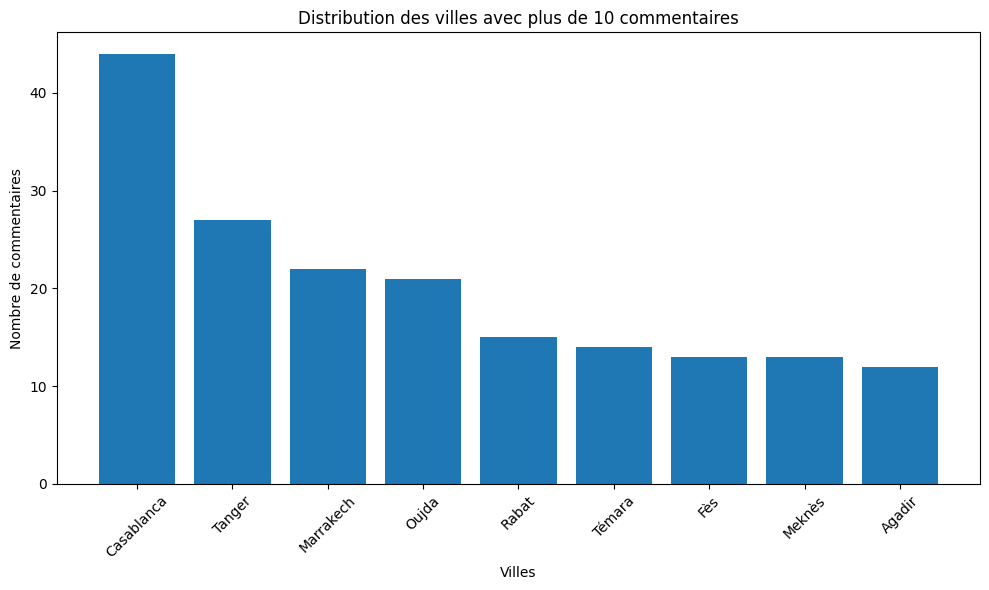

In [13]:
import matplotlib.pyplot as plt

# Compter le nombre d'occurrences de chaque ville
ville_counts = df['Ville'].value_counts()

# Filtrer les villes avec plus de 10 commentaires
ville_counts_filtered = ville_counts[ville_counts > 10]

# Créer un histogramme à partir des données de compte filtrées
plt.figure(figsize=(10, 6))  # Définir la taille de la figure
plt.bar(ville_counts_filtered.index, ville_counts_filtered.values)  # Créer un histogramme à barres
plt.xlabel('Villes')  # Définir le label de l'axe x
plt.ylabel('Nombre de commentaires')  # Définir le label de l'axe y
plt.title('Distribution des villes avec plus de 10 commentaires')  # Définir le titre du graphique
plt.xticks(rotation=45)  # Faire pivoter les étiquettes des villes pour faciliter la lecture
plt.tight_layout()  # Ajuster la mise en page du graphique
plt.show()  # Afficher le graphique



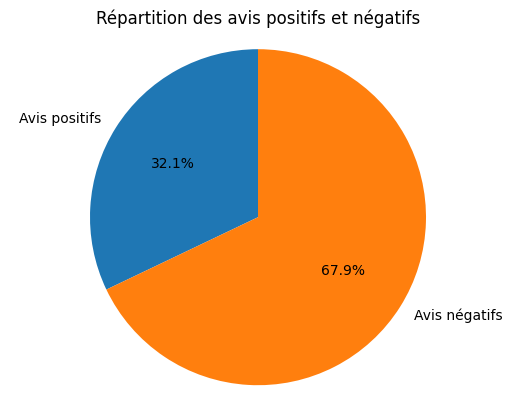

In [21]:
import matplotlib.pyplot as plt

# Compter le nombre d'occurrences des avis positifs et négatifs
positifs_count = df['Nombre_étoiles'][df['Nombre_étoiles'] == 1].count()
negatifs_count = df['Nombre_étoiles'][df['Nombre_étoiles'] == 0].count()

# Créer une liste de labels pour le diagramme
labels = ['Avis positifs', 'Avis négatifs']

# Créer une liste des valeurs pour le diagramme
values = [positifs_count, negatifs_count]

# Créer un diagramme en cercle
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Ajouter un titre au diagramme
plt.title('Répartition des avis positifs et négatifs')

# Afficher le diagramme
plt.axis('equal')  # Pour avoir un cercle parfait
plt.show()


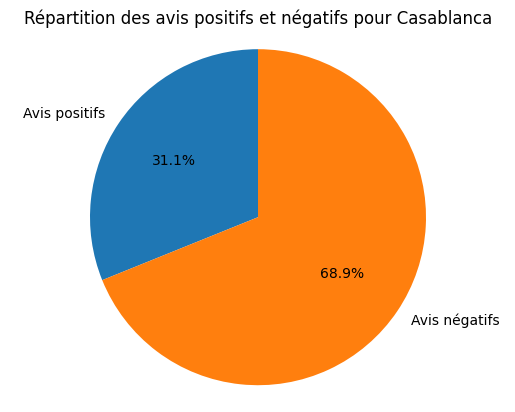

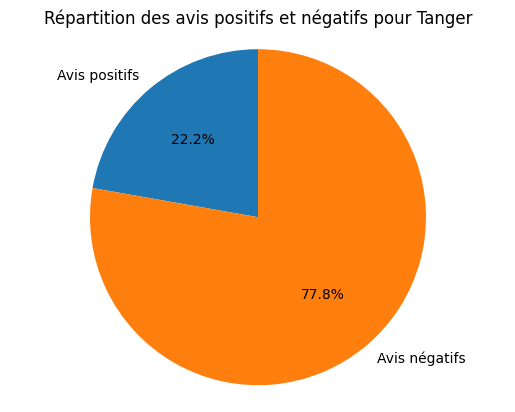

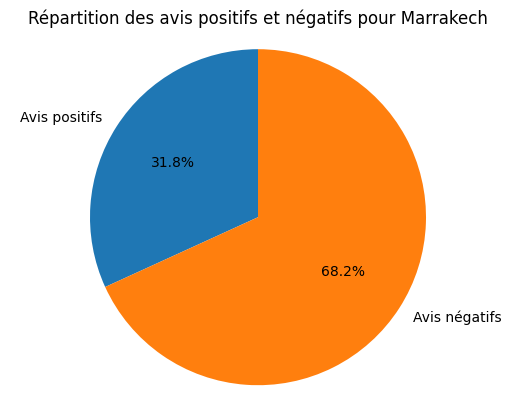

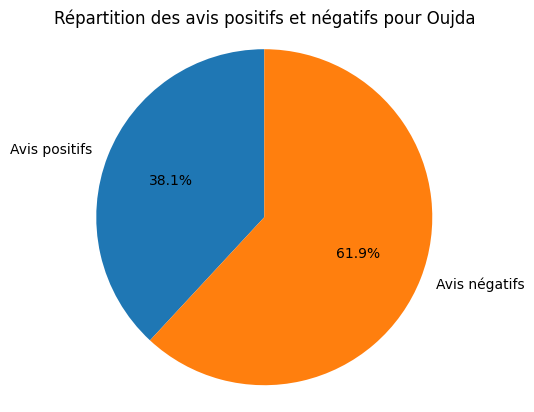

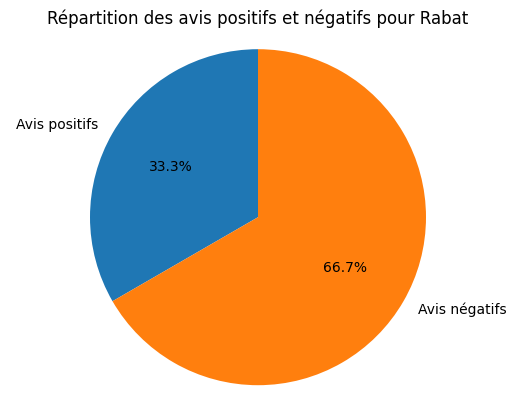

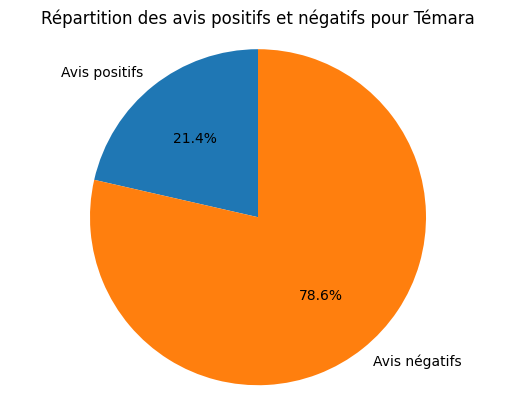

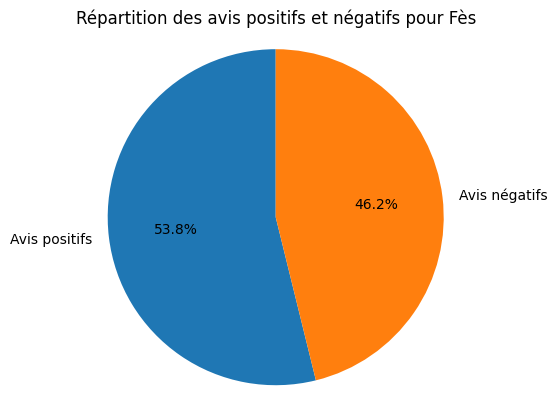

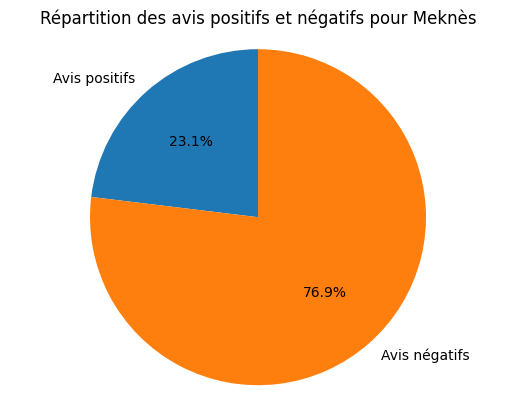

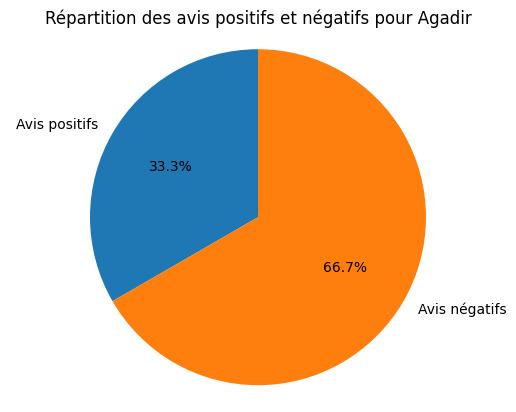

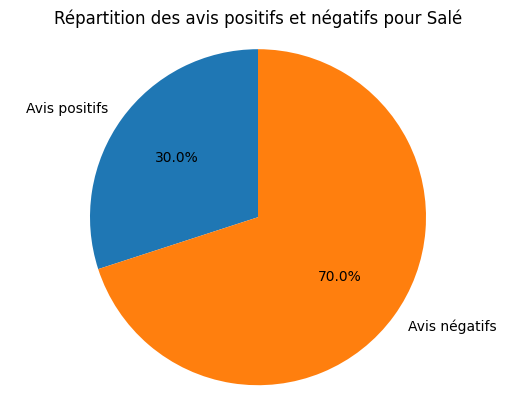

In [24]:
import matplotlib.pyplot as plt

# Obtenir les 10 villes avec le plus de commentaires
top_10_villes = df['Ville'].value_counts().nlargest(10).index.tolist()

# Parcourir les 10 villes avec le plus de commentaires
for ville in top_10_villes:
    # Filtrer les données pour la ville actuelle
    df_ville = df[df['Ville'] == ville]
    
    # Compter le nombre d'occurrences des avis positifs et négatifs pour la ville actuelle
    positifs_count = df_ville['Nombre_étoiles'][df_ville['Nombre_étoiles'] == 1].count()
    negatifs_count = df_ville['Nombre_étoiles'][df_ville['Nombre_étoiles'] == 0].count()

    # Créer une liste de labels pour le diagramme
    labels = ['Avis positifs', 'Avis négatifs']

    # Créer une liste des valeurs pour le diagramme
    values = [positifs_count, negatifs_count]

    # Créer un diagramme en cercle pour la ville actuelle
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f"Répartition des avis positifs et négatifs pour {ville}")

    # Afficher le diagramme pour la ville actuelle
    plt.axis('equal')
    plt.show()


In [28]:
import geopy
from geopy.geocoders import Nominatim

# Créer un géocodeur
geolocator = Nominatim(user_agent="my_geocoder")

# Fonction pour obtenir la région à partir des coordonnées
def get_region(latitude, longitude):
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    if location:
        return location.raw['address'].get('state')  # Modifier 'state' en fonction de la clé correspondante à la région dans la réponse du géocodeur
    else:
        return None

# Appliquer la fonction pour créer la colonne 'Région'
df['Région'] = df.apply(lambda row: get_region(row['Lattitude'], row['Longetude']), axis=1)
df

In [32]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.5 MB/s eta 0:00:00


In [35]:
import folium
from folium.plugins import HeatMap

# Créer une carte centrée sur le Maroc
m = folium.Map(location=[31.7917, -7.0926], zoom_start=6)

# Créer un dataframe contenant les coordonnées (latitude et longitude) et le taux de commentaires négatifs
heatmap_data = df[['Lattitude', 'Longetude', 'Nombre_étoiles']]
heatmap_data = heatmap_data[heatmap_data['Nombre_étoiles'] == 0]  # Filtre pour les commentaires négatifs uniquement

# Créer la heatmap en utilisant les coordonnées et le taux de commentaires négatifs
heatmap = HeatMap(data=heatmap_data, radius=10, blur=15)

# Ajouter la heatmap à la carte
heatmap.add_to(m)

# Afficher la carte
m
